In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D4-Allyson/S4/Office_Allyson-S4.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:7920]
test_data = df.iloc[7920:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (7896, 24, 1)
y_train.shape =  (7896,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [11]:
import tensorflow as tf
import sklearn.preprocessing
from keras.layers import Dense,Dropout,LSTM,Bidirectional
from keras.models import Sequential

In [12]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(24, activation='tanh', return_sequences=False), input_shape=(24,1)))
#model.add(Bidirectional(LSTM(24, activation='tanh')))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 48)               4992      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


In [18]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss="MSE")

In [19]:
history= model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
62/62 [==============================] - 15s 45ms/step - loss: 9.4816
Epoch 2/300
62/62 [==============================] - 2s 32ms/step - loss: 7.4533
Epoch 3/300
62/62 [==============================] - 1s 19ms/step - loss: 7.3996
Epoch 4/300
62/62 [==============================] - 1s 20ms/step - loss: 7.1965
Epoch 5/300
62/62 [==============================] - 1s 20ms/step - loss: 7.3831
Epoch 6/300
62/62 [==============================] - 1s 20ms/step - loss: 8.0694
Epoch 7/300
62/62 [==============================] - 1s 20ms/step - loss: 7.8758
Epoch 8/300
62/62 [==============================] - 1s 19ms/step - loss: 7.3487
Epoch 9/300
62/62 [==============================] - 1s 20ms/step - loss: 7.3053
Epoch 10/300
62/62 [==============================] - 1s 19ms/step - loss: 7.2654
Epoch 11/300
62/62 [==============================] - 1s 19ms/step - loss: 7.4584
Epoch 12/300
62/62 [==============================] - 1s 20ms/step - loss: 7.2580
Epoch 13/300
62/62 [====

In [20]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [22]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))
mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)
mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

print('RMSE for BiLSTM Model for training is:',rmse_train)
print('RMSE for BiLSTM Model for testing is:',rmse_test)
print('MAE for BiLSTM Model for training is:',mae_train)
print('MAE for BiLSTM Model for testing is:',mae_test)
print('MAPE for BiLSTM Model for training is:',mape_train)
print('MAPE for BiLSTM Model for testing is:',mape_test)

RMSE for BiLSTM Model for training is: 2.198124379217471
RMSE for BiLSTM Model for testing is: 6.413522477090951
MAE for BiLSTM Model for training is: 1.166837909673364
MAE for BiLSTM Model for testing is: 3.452849415088522
MAPE for BiLSTM Model for training is: 0.05929256567621459
MAPE for BiLSTM Model for testing is: 0.1354739713536361


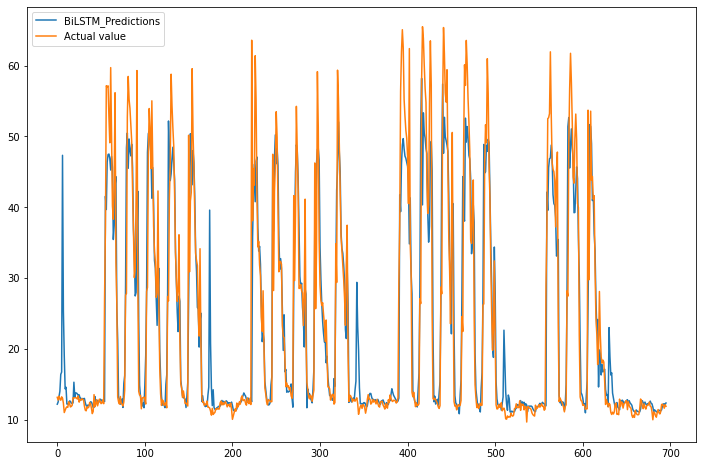

In [23]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='BiLSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [24]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([13.16]), array([12.18724], dtype=float32))

In [25]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.97276035]), array([0.27013733]), array([0.10367805]), array([-1.07380062]), array([-3.65205002]), array([-3.49727013]), array([-34.29277344]), array([-13.00507729]), array([-7.9821608]), array([-3.022607]), array([-2.9198378]), array([-0.39254349]), array([-0.47611977]), array([0.39758041]), array([-0.30891148]), array([-0.79900856]), array([-0.46093475]), array([-0.25258038]), array([0.7145203]), array([-2.23596424]), array([-0.11484829]), array([-0.65635574]), array([-0.71668644]), array([-0.71731457]), array([-0.0657114]), array([-1.03510048]), array([-0.19328346]), array([-0.28490139]), array([0.14924404]), array([-0.13970032]), array([-0.13828033]), array([-1.08870037]), array([-1.05455151]), array([-0.75486469]), array([-0.04803246]), array([-0.4051543]), array([-0.21907898]), array([0.28956692]), array([-0.26920437]), array([-0.85306847]), array([-1.308787]), array([-0.56727203]), array([1.80090431]), array([-1.43995754]), array([-0.31069855]), array([0.1645499]), arra

In [26]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([51.06015549]), array([-34.29277344]))

In [27]:
max(d1)-min(d1)

array([85.35292892])

In [28]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [29]:
len(neg),len(pos)

(417, 279)